In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.datasets import load_iris

주가 데이터 불러오기

In [2]:
def filter_df(df): #데이터프레임 필터링
    # 첫 번째 열에서 같은 값을 가진 행의 수를 계산합니다.
    row_counts = df['0'].value_counts()

    # 가장 많은 행의 수를 찾습니다.
    max_row_count = row_counts.max()

    # 가장 많은 행의 수에 해당하는 행만 분류합니다.
    filtered = pd.DataFrame(df[df['0'].isin(row_counts[row_counts == max_row_count].index)])

    return filtered

def rename_columns(df):
    new_columns = {column: i for i, column in enumerate(df.columns)}
    df.rename(columns=new_columns, inplace=True)
    
    return df

# 데이터 로드   
stock_df = pd.read_csv('/Users/moon/Desktop/Moon SeungHoo/Stock_Machine_Learning/StockData.csv',low_memory=False)
pred_df = pd.read_csv('/Users/moon/Desktop/Moon SeungHoo/Stock_Machine_Learning/StockData_Pred_1108.csv',low_memory=False)

#데이터 필터링
filter_stock = filter_df(stock_df)
filter_label = filter_stock['18']

filter_pred= filter_df(pred_df)

# 예측에 필요한 데이터 
pred_ticker = filter_pred['0'].tolist() #종목코드 저장

# 불필요한 데이터 삭제
filter_stock = filter_stock.drop({'0','1','7','18'},axis=1) #날자, 상승율, 5%이상 상승여부 삭제 
filter_pred = filter_pred.drop({'0','1','7'},axis=1)#날자, 상승율 삭제

#열 이름 초기화
filter_stock = rename_columns(filter_stock)
filter_pred = rename_columns(filter_pred)

데이터 분할

In [3]:
# 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(filter_stock, filter_label, test_size=0.2, random_state=42)

Random Forest 모델 파라미터 튜닝

In [4]:
# def objective(params):
#     # 하이퍼파라미터
#     n_estimators = int(params['n_estimators'])
#     max_depth = int(params['max_depth'])
#     min_samples_split = int(params['min_samples_split'])
#     min_samples_leaf = int(params['min_samples_leaf'])

#     # 랜덤 포레스트 모델 생성
#     model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42
#     )

# # K-Fold 교차 검증
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#     mean_accuracy = np.mean(scores)

#     return {'loss': 1 - mean_accuracy, 'status': STATUS_OK}

In [5]:
# # Bayesian Optimization을 위한 탐색 공간 정의
# space = {
#     'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
#     'max_depth': hp.quniform('max_depth', 2, 20, 1),
#     'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
# }

# # Bayesian Optimization 실행
# trials = Trials()
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# print("최적 하이퍼파라미터:")
# print(best)

모델 정의 ∙ 학습

In [6]:
# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=153, max_depth=20 ,min_samples_leaf=5,min_samples_split=3, random_state=42,verbose=2, n_jobs=8)

# 모델 학습
model.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 153building tree 2 of 153
building tree 3 of 153

building tree 4 of 153
building tree 5 of 153
building tree 6 of 153
building tree 7 of 153
building tree 8 of 153
building tree 9 of 153
building tree 10 of 153
building tree 11 of 153
building tree 12 of 153
building tree 13 of 153
building tree 14 of 153
building tree 15 of 153
building tree 16 of 153
building tree 17 of 153
building tree 18 of 153
building tree 19 of 153
building tree 20 of 153
building tree 21 of 153
building tree 22 of 153
building tree 23 of 153
building tree 24 of 153
building tree 25 of 153
building tree 26 of 153
building tree 27 of 153
building tree 28 of 153
building tree 29 of 153
building tree 30 of 153
building tree 31 of 153
building tree 32 of 153
building tree 33 of 153


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   14.9s


building tree 34 of 153
building tree 35 of 153
building tree 36 of 153
building tree 37 of 153
building tree 38 of 153
building tree 39 of 153
building tree 40 of 153
building tree 41 of 153
building tree 42 of 153
building tree 43 of 153
building tree 44 of 153
building tree 45 of 153
building tree 46 of 153
building tree 47 of 153
building tree 48 of 153
building tree 49 of 153
building tree 50 of 153
building tree 51 of 153
building tree 52 of 153
building tree 53 of 153
building tree 54 of 153
building tree 55 of 153
building tree 56 of 153
building tree 57 of 153
building tree 58 of 153
building tree 59 of 153
building tree 60 of 153
building tree 61 of 153
building tree 62 of 153
building tree 63 of 153
building tree 64 of 153
building tree 65 of 153
building tree 66 of 153
building tree 67 of 153
building tree 68 of 153
building tree 69 of 153
building tree 70 of 153
building tree 71 of 153
building tree 72 of 153
building tree 73 of 153
building tree 74 of 153
building tree 75

[Parallel(n_jobs=8)]: Done 153 out of 153 | elapsed:  1.2min finished


RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=153, n_jobs=8, random_state=42, verbose=2)

모델 평가

In [7]:
# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s


모델 정확도: 0.9710691025630855


[Parallel(n_jobs=8)]: Done 153 out of 153 | elapsed:    0.4s finished


예측

In [8]:
def make_six_digit_list(input_list):
    six_digit_list = []

    for item in input_list:
        # 현재 항목의 길이를 확인
        item_str = str(item)
        item_len = len(item_str)

        if item_len < 6:
            # 6자리가 안되는 항목은 앞에 0을 채워서 6자리로 만듭니다.
            zero_padding = '0' * (6 - item_len)
            six_digit_item = zero_padding + item_str
            six_digit_list.append(six_digit_item)
        else:
            # 이미 6자리인 경우 그대로 유지
            six_digit_list.append(item_str)

    return six_digit_list

In [9]:
T_pred = model.predict(filter_pred)

# 5% 이상 오를 종목 식별
rising_stocks = [ticker for i, ticker in enumerate(pred_ticker) if T_pred[i] > 0.9]

# T_pred를 기준으로 내림차순 정렬
rising_stocks_sorted = sorted(rising_stocks, key=lambda i: T_pred[pred_ticker.index(i)], reverse=True)
rising_stocks_sorted = list(map(str, rising_stocks_sorted))
result = list(set(rising_stocks_sorted))
result = make_six_digit_list(result)
print("내일 5% 이상 상승할 종목:", result)
print(len(result))

내일 5% 이상 상승할 종목: ['122870', '277810', '058400', '361570', '064260', '000210', '328130', '033320', '066970', '377480', '200710', '094480', '005070', '060250', '046970', '229640', '071460', '185750', '010170', '272290', '322510', '123860', '166480', '131970', '039440', '427950', '290120', '009190', '221800', '240810', '211270', '009420', '066790', '074610', '247540', '383310', '094170', '009520', '051915', '010600', '056080', '054920', '073640', '079810', '388790', '189690', '042600', '006740', '002710', '254490', '178920', '002880', '133750', '196170', '131400', '036480', '001570', '101670', '039030', '055490', '156100', '084370', '380540', '238090', '046940', '067310', '011810', '020150', '073570', '036090', '007660', '095340', '304100', '320000', '115180', '402030', '005490', '018290', '035720', '352770', '009620', '001840', '011790', '017890', '204270', '089010', '058610', '028300', '071950', '214390', '299900', '119650', '403870', '137940', '087010', '110990', '011500', '069540', '0

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 153 out of 153 | elapsed:    0.0s finished


예측한 결과 검증

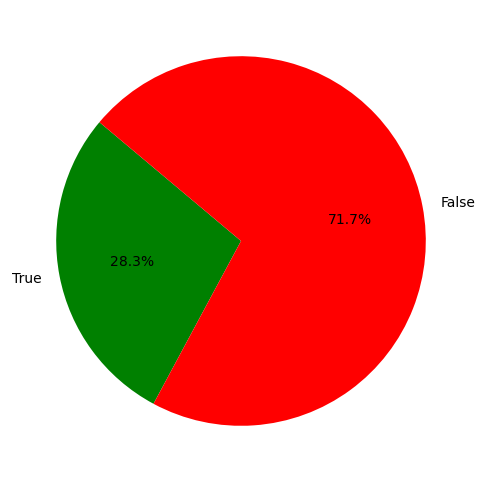

In [11]:
def check_price_increase(stock_codes):
    result = {}
    
    for code in stock_codes:
        df = fdr.DataReader(code,'2023-11-07','2023-11-08')
                
        if len(df) < 2:
            result[code] = False
        else:
            today_close = df['Change'].iloc[-1]

            if today_close >=  0:
                result[code] = True
            else:
                result[code] = False
    return result

result_TF = check_price_increase(result)
result_TF = list(result_TF.values())

# True와 False의 개수를 세어 비율을 계산
true_count = sum(result_TF)
false_count = len(result_TF) - true_count

# 비율을 파이그래프로 표현
labels = ['True', 'False']
sizes = [true_count, false_count]
colors = ['green', 'red']

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# 그래프 표시
plt.show() 